# Ex 1

The company Fränzi and Friends developed a 2nd-generation quick test at home for
SARS-Cov-2, which is pending regulatory agency’s review. The test has been shown to have a
sensitivity of 99.5% and a specificity of 99.5%. Suppose that Fred uses the test by Fränzi and
Friends and the test was positive. Assume that 5% of the population is in fact infected. Was is
your guess about the probability that Fred is indeed infected?


### Solution 

#### Approach 1

Assume we have 100,000 people living in a city, and 95% (95,000) are healthy while 5% (5,000) are sick. If we test all people using the Fränzi test, it turns out that 99.5% of the test results will be correct and 0.5% will be wrong.

For the healthy part of the population, this means that $95,000 \times 0.995 = 94,525$ people get a **true negative** test result, and $95,000 \times 0.005 = 475$ people get a **false positive** result.

For the sick part of the population, $5,000 \times 0.995 = 4,975$ people get a **true positive** result, and $5,000 \times 0.005 = 25$ people get a **false negative** result.

The probability that Fred gets a positive test result given the fact that he is indeed infected is approximately:

$$
\frac{\text{number of true positive results}}{\text{total number of positive results}} = \frac{4,975}{475 + 4,975} = 0.913
$$


#### Approach 2 

Using Bayes rule

$$ P(\text{Infected}| \text{Positive}) = \frac{ P(\text{Positive}| \text{Infected}) P (\text{Infected})}{P(\text{Positive})} $$


where 


- $P(\text{Positive}) = P(\text{Positive}| \text{Not Infected}) P(\text{Not Infected}) +  P(\text{Positive}| \text{Infected})  P(\text{Infected})$

$=  (1-P(\text{Negative}| \text{Not Infected}) * P(\text{Not Infected}) +  P(\text{Positive}| \text{Infected}) P(\text{Infected}) = (1-0.995)0.95 + 0.995*0.05 = 0.0545$ 


- $P(\text{Positive}| \text{Infected}) = \frac{TP}{FN+TP} =  0.995 $ - sensitivity of the test
- $P(\text{Negative}| \text{Not Infected}) = \frac{TN}{FP+TN} = 0.995 $ - specificity of the test

- $P(\text{Infected}) = 0.05$
- $P(\text{Not Infected}) = 1-0.05 = 0.95$


Putting everything together:

$  P(\text{Infected}| \text{Positive}) = 0.995 * 0.05 / 0.0545 = 0.9128 \approx 0.913 $



# Ex 2 

Please share a piece of code that visualizes the probability that Fred is indeed infected
as the dependent variable, with the infection prevalence (5% in the example above, which takes
any real-number value between 0.001% to 50%) and the specificity (99% in the example above,
which takes values 99%, 99.9%,99.99%, and 99.999%) as independent variables. For simplicity,
we fix the sensitivity at 99%. Visualize the results if possible, and use integers to check and
explain your results. Use any programming language that you prefer. Please put your code in
GitHub or GitLab or other code-hosting service and paste the link below.

### Solution 

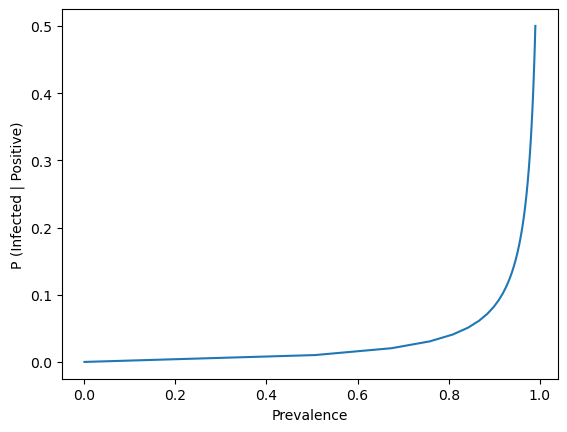

In [26]:
import numpy as np 
import matplotlib.pyplot as plt

def prob_I_given_P(prevalence, specificity):
    
    sensitivity = 0.995 
    numerator = sensitivity * prevalence 
    denominator = (1-specificity)*(1-prevalence) + sensitivity * prevalence

    return numerator/denominator

# def prob_I_given_P_integers(prevalence, specificity):
    
#     sensitivity = 0.995 

#     N = 10**5 
    
#     numerator = sensitivity * (prevalence * N)
#     denominator = sensitivity * (prevalence * N) +  N*(1-prevalence)*(1-specificity)

#     return numerator/denominator


prevalence_range = np.linspace(10**(-5), 0.5, 50) # 0.001% to 50%
specificity_range =  np.array([0.99, 0.999,0.9999, 0.99999])


plt.plot(prob_I_given_P(prevalence_range, specificity_range[0]), prevalence_range )  
plt.xlabel("Prevalence")
plt.ylabel("P (Infected | Positive)");

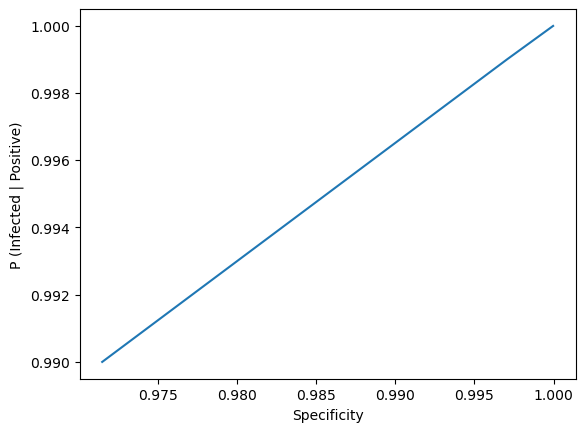

In [27]:
plt.plot(prob_I_given_P(prevalence_range[25], specificity_range), specificity_range )  
plt.xlabel("Specificity")
plt.ylabel("P (Infected | Positive)");

# Ex 3 
What are your interpretations of the results?

### Solution 